In [53]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Uniform Manifold Approximation and Projection (UMAP):

UMAP is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data

    The data is uniformly distributed on a Riemannian manifold;
    The Riemannian metric is locally constant (or can be approximated as such);
    The manifold is locally connected.

From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.

In [46]:
digits = pd.read_csv("mnist.csv")
target = digits['label'].values

In [54]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



- n_neighbors : This determines the number of neighboring points used in local approximations of manifold structure. Larger values will result in more global structure being preserved at the loss of detailed local structure. In general this parameter should often be in the range 5 to 50, with a choice of 10 to 15 being a sensible default.
- min_dist: This controls how tightly the embedding is allowed compress points together. Larger values ensure embedded points are more evenly distributed, while smaller values allow the algorithm to optimise more accurately with regard to local structure. Sensible values are in the range 0.001 to 0.5, with 0.1 being a reasonable default.
        
- metric: This determines the choice of metric used to measure distance in the input space. A wide variety of metrics are already coded, and a user defined function can be passed as long as it has been JITd by numba.



In [26]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(digits.iloc[:20000, 1:])

In [40]:
embedding[:10,0]

array([-11.021218 ,   9.298491 ,  -9.487931 ,   3.279305 ,   9.362622 ,
         8.288184 ,  -5.596256 ,   3.14359  ,   6.2818117,   2.7034116],
      dtype=float32)

In [48]:
df = pd.DataFrame(embedding, columns=('x', 'y'))

In [50]:
df['class'] = digits['label']

In [51]:
df.head()

,x,y,class
0,-11.021218,7.599355,1
1,9.298491,6.708321,0
2,-9.487931,3.019284,1
3,3.279305,-9.719725,4
4,9.362622,7.248697,0


<Figure size 864x864 with 0 Axes>

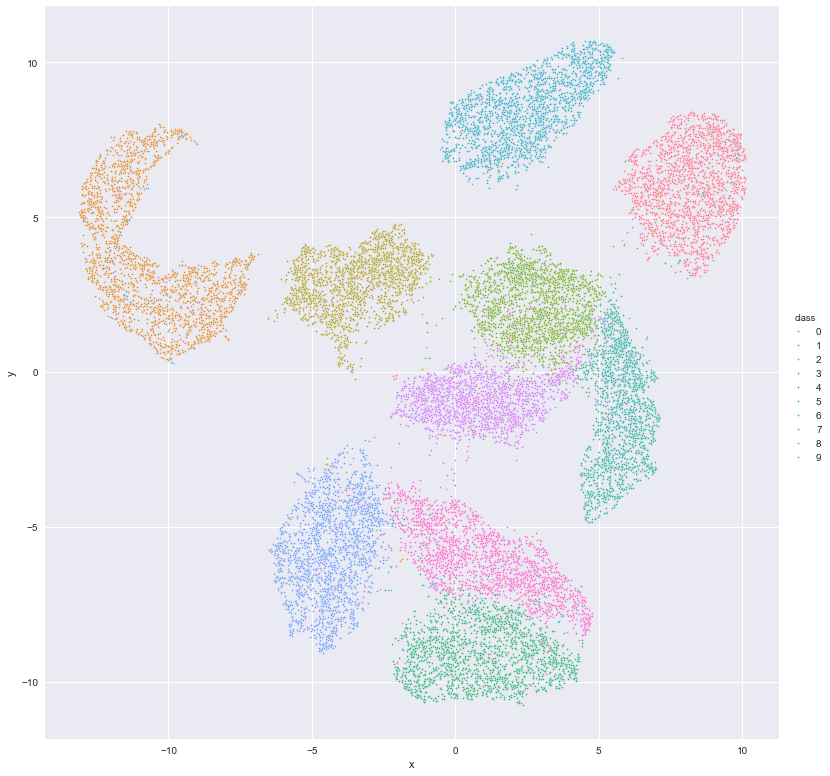

In [56]:
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, 
             hue = "class",size=11, plot_kws={"s": 4});
plt.show()